In [1]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [136]:
# # modelling libraries
# from sklearn import preprocessing
# plt.rc("font", size=14)
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# import seaborn as sns
# # sns.set(style="white")
# # sns.set(style="whitegrid", color_codes=True)

In [2]:
%matplotlib inline
# Inline matplotlib (keep charts in this nb)
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')
# This was a marning on the KDE plot for 2D topo mappings

In [4]:
# Read in dataset
data = pd.read_csv('transfusion.csv')

data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB



    Recency - months since the last donation)
    Frequency - total number of donation)
    Monetary - total blood donated in c.c.)
    Time - months since the first donation)
    a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)


In [6]:
# Rename target column as 'target' 
data.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)


data.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [44]:
data.dtypes

Recency (months)         int64
Frequency (times)        int64
Monetary (c.c. blood)    int64
Time (months)            int64
target                   int64
dtype: object

In [45]:
# %%time
# # Line plot of points/reviews
# data['Recency (months)'].value_counts().sort_index().plot.line()

### Exploring the data : 1 stands for donating blood; 0 stands for not donating blood

In [56]:
data['target'].value_counts()

0    570
1    178
Name: target, dtype: int64

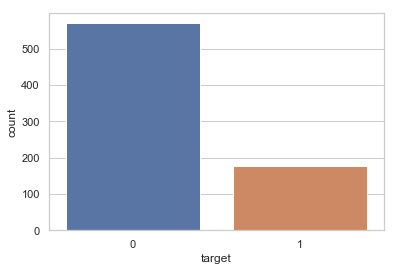

In [137]:
sns.countplot(x='target', data=data)
plt.show()

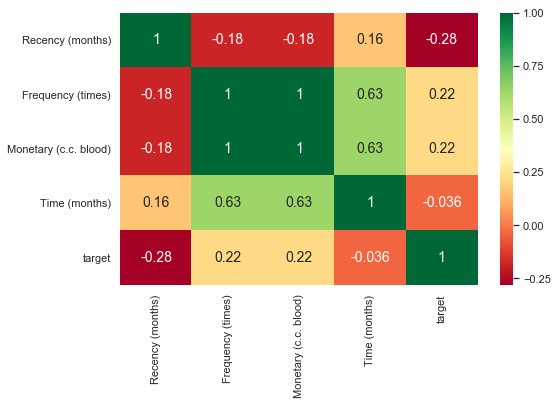

In [138]:
# col = ["Recency (months)", "Frequency (times)", "Monetary (c.c. blood)", "Time (months)"]
# X = [col]

plt.subplots(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Calculate Percentage of Donors and Non donors

In [74]:
count_non_don = len(data[data['target']==0])
count_don = len(data[data['target']==1])

x = round((count_non_don/(count_non_don + count_don)*100),2)
print(f"percentage of no donors ===== {x}%")

y = round((count_don/(count_non_don + count_don)*100),2)
print(f"\npercentage of donors ======== {y}%")

percentage of no donors ===== 76.2%

percentage of donors ======== 23.8%


### Logistic Regression

In [104]:
#data[['Recency (months)', 'Time (months)', 'target']].tail()
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [123]:
X = data.iloc[:, [0,1,3]].values
Y = data.iloc[:, 4].values


In [124]:
X

array([[ 2, 50, 98],
       [ 0, 13, 28],
       [ 1, 16, 35],
       ...,
       [23,  3, 62],
       [39,  1, 39],
       [72,  1, 72]], dtype=int64)

In [126]:
#Y

In [139]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [140]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
# Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [142]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)

In [143]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [144]:
var_prob = classifier.predict_proba(X_test)
var_prob[0, :]

array([0.75055411, 0.24944589])

In [146]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[129,   3],
       [ 50,   5]], dtype=int64)